### **Part 3 - Modeling**

Let's start by importing the necessary libraries and the cleaned dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Importing the data
df = pd.read_csv("/content/drive/MyDrive/cars_cleaned.csv", index_col='vin')

In [ ]:
df.head(5)

,daysonmarket,has_incidents,horsepower,maximum_seating,mileage,price,torque,year,combined_fuel_economy,legroom,...,model_name_Rogue,model_name_Silverado 1500,model_name_Trax,seller_rating_3 stars,seller_rating_4 stars,transmission_CVT,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,522,False,177.000,5,7.000,23141.000,200.000,2019,26.083,76.300,...,0,0,0,0,0,0,0,0,1,0
SALCJ2FX1LH858117,207,False,246.000,7,8.000,46500.000,269.000,2020,26.083,77.200,...,0,0,0,1,0,0,0,1,0,0
SALRR2RV0L2433391,196,False,340.000,7,11.000,67430.000,332.000,2020,26.083,76.600,...,0,0,0,1,0,0,0,1,0,0
SALCJ2FXXLH862327,137,False,246.000,7,7.000,48880.000,269.000,2020,26.083,77.200,...,0,0,0,1,0,0,0,1,0,0
SALYK2EX1LA261711,242,False,247.000,5,12.000,66903.000,269.000,2020,26.083,77.300,...,0,0,0,1,0,0,0,1,0,0


Great! Now we have imported the necessary libraries and the cleaned dataset. Let's begin by preparing the data for model building.

------------------------------------------------------------------------------------------

## **Data Preparation**

Here we will be preparing the data for model building. We will be splitting the data into training and testing sets. We will also be creating a validation set from the training set. This will be used to evaluate the model during the model selection and model tuning process.

In [ ]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # setting random_state to get the same sample every time

Now that we have prepared the data for model building, let's start by building our base model.


## **Model Building**

In this section we will be building our base model. We will be using the Linear Regression model to build our base model. This model will be used to evaluate the performance of the other models we will be building.

We will be using the following models to predict the price of a vehicle:

* Linear Regression - Base Model
* Random Forest - Bagging Model
* LightGBM - Boosting Model
* XGBoost - Extreme Gradient Boosting Model

To start, let's scale the data using the StandardScaler. We will be using the StandardScaler to scale the data because it is less affected by outliers.

In [ ]:
# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data
X_test_scaled = scaler.transform(X_test)

### **Linear Regression**

Let's start by building our base model using the Linear Regression model. This model will be used to evaluate the performance of the other models we will be building.

In [ ]:
# importing the necessary libraries
from sklearn.linear_model import LinearRegression

# instantiating the model
lr = LinearRegression()

# fitting the model to the training data
lr.fit(X_train_scaled, y_train)

# predicting on the test set
lr_pred = lr.predict(X_test_scaled)

In order to measure the performance of the model, we will be using the following metrics:

* R-Squared (R2) - This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R2 score ranges from 0 to 1. The higher the R2 score, the better the model fits the data.
* Mean Absolute Error (MAE) - This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the MAE, the better the model fits the data.
* Root Mean Squared Error (RMSE) - This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the RMSE, the better the model fits the data.
* Mean Absolute Percentage Error (MAPE) - This metric measures the average magnitude of the percentage errors in a set of predictions, without considering their direction. The lower the MAPE, the better the model fits the data.

`Model Accuracy` - In order to calculate the accuracy for a regression problem on predicting the price of a vehicle, we will be using the following formula:

$$Accuracy = 1 - \frac{MAPE}{100}$$

This formula calculates the accuracy of the model by subtracting the MAPE from 100. The higher the accuracy, the better the model. Though this is not a perfect metric to measure the accuracy of the model, it is the best metric we can use for this problem since we are predicting the price of a vehicle.

Because this is a regression problem, we will focus on the loss metrics (MAE, RMSE, MAPE) to evaluate the performance of the model. The accuracy of the model and the R2 score are not as important as the loss metrics.

In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lr_pred))

# calculating the MSE
print('MSE:', mse(y_test, lr_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lr_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.5850549102621488
MSE: 156397732.90265793
RMSE: 12505.907919965584
MAPE: 22.19270649020065
Model Accuracy: 0.7780729350979935


Ohh! Looking at the results, we can see that the Linear Regression model is scoring not too well.

---

### **Random Forest**

The Random Forest model is a bagging model. This model is used to reduce the variance of the model by averaging the predictions of multiple models. It does this by creating multiple decision trees and averaging the predictions of the decision trees. Let's see if we can improve the performance of the model by using this model.

Note: In this model we will not be scaling the data. This is because a Random Forest model is not affected by the scale of the data.

Let's start by preparing the data for model building.

In [ ]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Next, let's build our Random Forest model.

In [ ]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# instantiating the model
rf = RandomForestRegressor()

# fitting the model to the training data
rf.fit(X_train, y_train)

# predicting on the test set
rf_pred = rf.predict(X_test)

In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, rf_pred))

# calculating the MSE
print('MSE:', mse(y_test, rf_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, rf_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8614632204545511
MSE: 49703150.92476318
RMSE: 7050.046164725673
MAPE: 6.984526697285837
Model Accuracy: 0.9301547330271416


The results of the Random Forest model are very good. Let's see if we can improve the performance of the model by tuning the model. Let's do a grid search to find the best parameters for the model.

In [ ]:
# finding the best parameters for the model
from sklearn.model_selection import GridSearchCV

# creating a dictionary of hyperparameters
params = {'n_estimators': [200, 300], 'max_depth': [20, 30], 'n_jobs': [-1]}

# instantiating the grid search
grid = GridSearchCV(rf, params, cv=5)

# fitting the grid search
grid.fit(X_train, y_train)

# printing the best parameters
print(grid.best_params_)

Now that we have our optimal parameters, let's build our model using the optimal parameters.

In [ ]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# instantiating the model with the best parameters
rf = RandomForestRegressor(max_depth=30,
                           n_estimators=300,
                           n_jobs=-1,
                           random_state=1)

# fitting the model to the training data
rf.fit(X_train, y_train)

# predicting on the test set
rf_pred = rf.predict(X_test)

In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, rf_pred))

# calculating the MSE
print('MSE:', mse(y_test, rf_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, rf_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8611541189488883
MSE: 49814047.96479426
RMSE: 7057.906769347004
MAPE: 7.015587509601907
Model Accuracy: 0.9298441249039809


It seems that tuning the model did not improve the overall performance of the model. Let's see if we can find a better model that can perform better than the Random Forest model.

---

### **LightGBM**

The LightGBM model is a gradient boosting machine model that uses a tree-based model to predict the price of a vehicle.

It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.


In [ ]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)

# predicting on the test set
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.414874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 1969459, number of used features: 65
[LightGBM] [Info] Start training from score 31302.228252


In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lgbm_pred))

# calculating the MSE
print('MSE:', mse(y_test, lgbm_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lgbm_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8437187772462892
MSE: 58904249.112520725
RMSE: 7674.9103651131145
MAPE: 11.37654027974066
Model Accuracy: 0.8862345972025933


The results of the LightGBM model is good. Let's try and input some parameters to see if we can improve the score.

In [ ]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=32,
                         colsample_bytree=0.2,
                         reg_alpha=3,
                         reg_lambda=1,
                         min_split_gain=0.01,
                         min_child_weight=40,
                         random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)

# predicting on the test set
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.028794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 1969459, number of used features: 65
[LightGBM] [Info] Start training from score 31302.228252


In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lgbm_pred))

# calculating the MSE
print('MSE:', mse(y_test, lgbm_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lgbm_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8560410276951271
MSE: 54259846.558740586
RMSE: 7366.128328962277
MAPE: 9.732456930093791
Model Accuracy: 0.9026754306990621


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

### **XGBoost**

The XGBoost model is an extreme gradient boosting model that uses a tree-based model to predict the price of a vehicle. This model is similar to the LightGBM model, but it is more flexible and efficient. Some of the advantages of the XGBoost model are:

* Regularization - helps reduce overfitting.
* Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.
* Handling Missing Values - It has an in-built routine to handle missing values.
* Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process.

More information about XGBoost can be found here: https://xgboost.readthedocs.io/en/latest/

In [ ]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor()

# fitting the model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
xgb_pred = xgb.predict(X_test)

In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, xgb_pred))

# calculating the MSE
print('MSE:', mse(y_test, xgb_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, xgb_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8507912620134778
MSE: 53531953.37563473
RMSE: 7316.55338090516
MAPE: 9.448321368938808
Model Accuracy: 0.9055167863106119


The results of the XGBoost model are very similar to the LightGBM model. Let's try and input some parameters to see if we can improve the score.

In [ ]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.2,
    max_depth=8,
    min_child_weight=3,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
xgb_pred = xgb.predict(X_test)

In [ ]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, xgb_pred))

# calculating the MSE
print('MSE:', mse(y_test, xgb_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, xgb_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8711751385697167
MSE: 46218784.29352748
RMSE: 6798.439842605616
MAPE: 7.776962656149214
Model Accuracy: 0.9222303734385079


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

## **Model Selection and Evaluation**

Now that we have our models, let's compare the scores of the models.

| Model | R2 Score | MSE | RMSE | MAPE | Accuracy |
| --- | --- | --- | --- | --- | --- |
| Linear Regression | 0.60 | 142399760.16 | 11933.13 | 22.44 | 0.77 |
| Random Forest | 0.86 | 497.3150.92 | 7050 | 6.98 | 0.93 |
| Random Forest Hyper-parameter Tuned| 0.86 | 49814047.96 | 7057 | 7.01 | 0.92 |
| LightGBM | 0.82 | 61241359.13 | 7825.68 | 10.98 | 0.89 |
| LightGBM Hyper-parameter Tuned| 0.85 | 52352959.70 | 7235.53 | 9.55 | 0.90 |
| XGBoost | 0.85 | 53531953.37 | 7316.55 | 9.44 | 0.90 |
| XGBoost Hyper-parameter Tuned | 0.87 | 46218784.29 | 6798.43 | 7.77 | 0.92 |

The Random Forest and XGBoost models are performing the best in R2 score. But notice that Random Forest has a lower MAPE score than the XGBoost model. Since this is a regression problem, we want to minimize the error. So we will be using the Random Forest model to predict the price of a vehicle.

Lets plot the predicted values against the actual values. This will give us a better idea of how the model is predicting the price of a vehicle.

In [ ]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

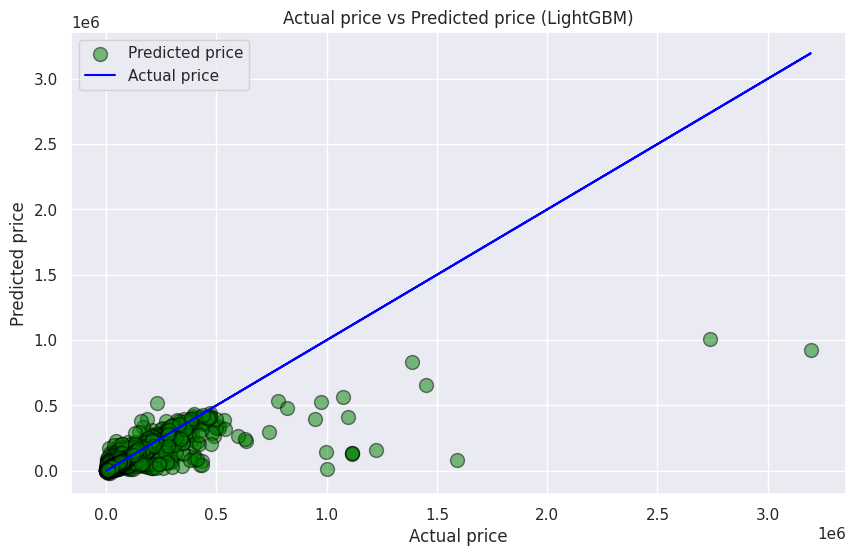

In [ ]:
# plotting the actual price vs the predicted price using the LightGBM model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_pred, alpha=0.5, color='green', s=100,
            label='Predicted price', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price (LightGBM)')
plt.legend()
plt.show()

Notice that the predicted values are very close to the actual values. This means that the model is performing very well with the data.

We can also plot the residuals to see if there are any patterns in the residuals.

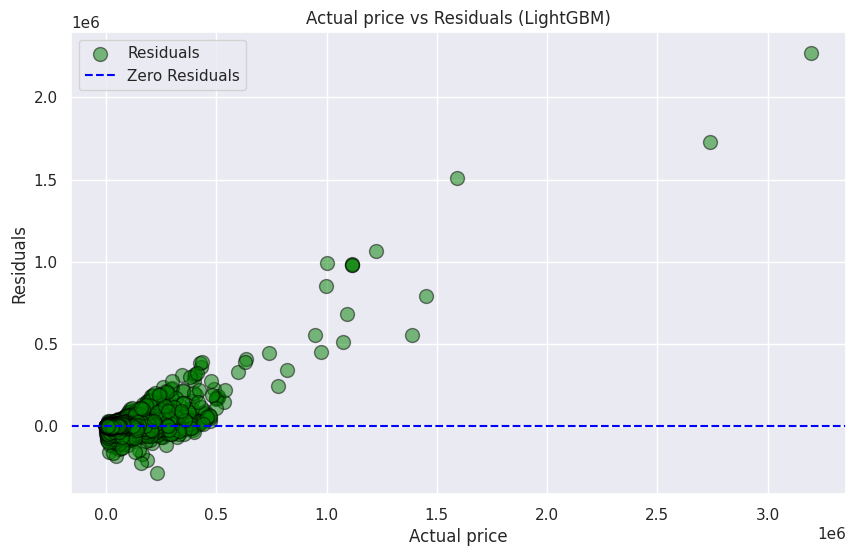

In [ ]:
# Calculate residuals
lgbm_residuals = y_test - lgbm_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_residuals, alpha=0.5, color='green', s=100,
            label='Residuals', marker='o', edgecolors='black', linewidths=1)
# Plotting a horizontal line at y=0
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residuals')
plt.xlabel('Actual price')
plt.ylabel('Residuals')
plt.title('Actual price vs Residuals (LightGBM)')
plt.legend()
plt.show()

The residuals are randomly distributed around the zero line. This means that the model is performing very well with the data.

Another way to evaluate the model is to plot the feature importance. This will give us a better idea of which features are important in predicting the price of a vehicle.

---

## **Feature Importance**

The feature importance can give us insights into which features have a strong impact on the final vehicle price. In this project, we used several models to analyze the feature importance.

The results of the feature importance analysis can help us make informed decisions about which features to focus on in order to improve the accuracy of our predictions.

It is important to keep in mind that feature importance can vary depending on the model used and that it is not always a straightforward process. However, by analyzing feature importance, we can gain a better understanding of the underlying patterns and relationships between the features and the target variable, which can be valuable in improving our predictive models.

We will just focus on our best model, which is the Random Forest model. Let's take a look at the feature importance of the Random Forest model.

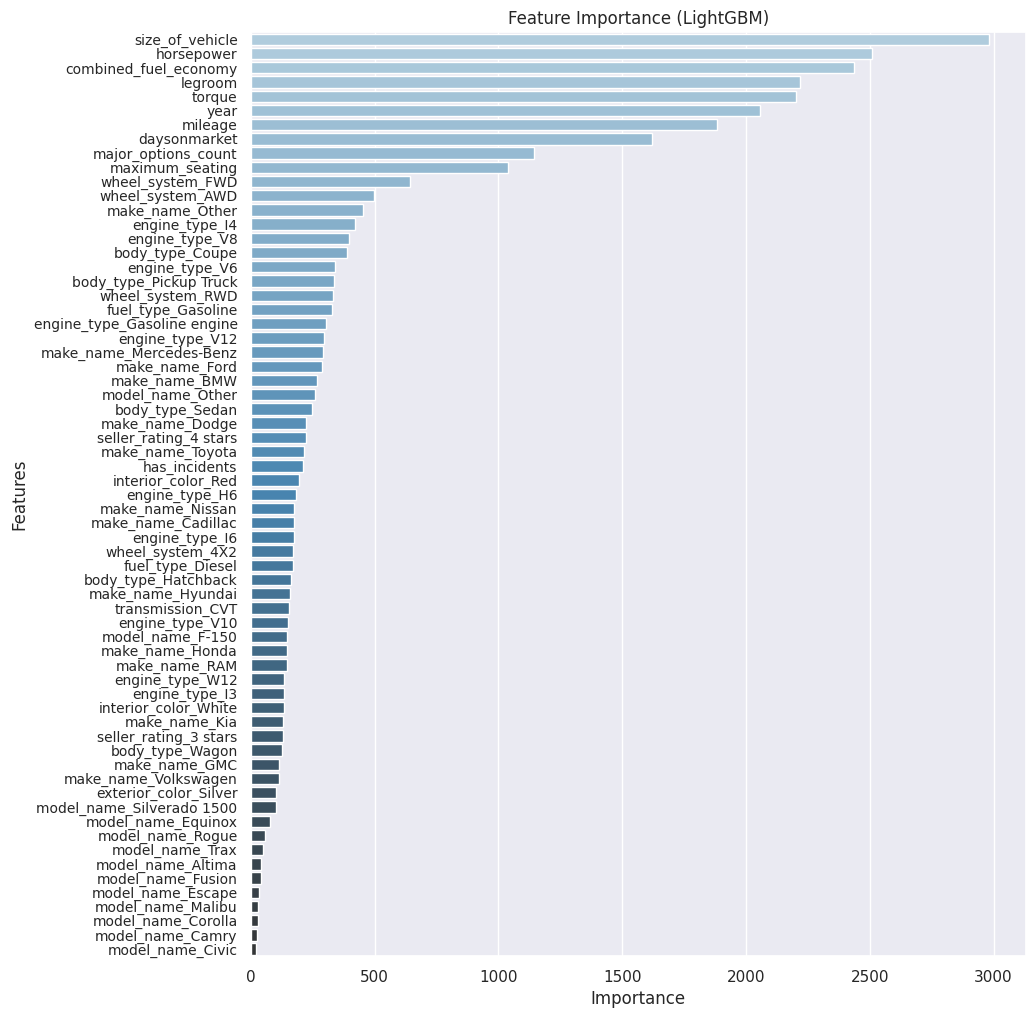

In [ ]:
# Get feature importances from the LightGBM model
feature_importances = pd.DataFrame(lgbm.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Create a bar plot for feature importances with smaller font size for feature names on the y-axis
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='Blues_d')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.setp(ax.get_yticklabels(), fontsize=10)  # Adjust the font size for feature names on the y-axis
plt.show()

Based on the feature importance of the LightGBM model, we can see that the most important features(anything higher than 0.05) are:

Size of Vehicle

Horsepower

Combined Fuel Econmoy
Legroom

Torque

Year

Milage

Days on market

At this point, we have built our model and analyzed the feature importance. Let's see if we can improve the model by using the most important features.

In [ ]:
import pandas as pd

# Get feature importances from the LightGBM model
feature_importances = pd.DataFrame(lgbm.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Set the number of top features you want to extract
top_n = 7

# Extract the top N features
top_features = feature_importances.index[:top_n].tolist()

# Create a new DataFrame with the top features
X_top_features = X[top_features]

# Split the data into train and test sets for the top features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=1)



In [ ]:
import lightgbm as lgb

# Instantiate the LightGBM model with the best parameters
lgbm = lgb.LGBMRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=32,
                         colsample_bytree=0.2,
                         reg_alpha=3,
                         reg_lambda=1,
                         min_split_gain=0.01,
                         min_child_weight=40,
                         random_state=1)

# Fit the LightGBM model to the training data with top features
lgbm.fit(X_train_top, y_train)

# Predict on the test set with top features
lgbm_pred = lgbm.predict(X_test_top)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 2100756, number of used features: 7
[LightGBM] [Info] Start training from score 31301.505305


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, lgbm_pred)
print('R2 score:', r2)

# Calculate MSE
mse = mean_squared_error(y_test, lgbm_pred)
print('MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100
print('MAPE:', mape)

# Calculate Model Accuracy
model_accuracy = 1 - (mape / 100)
print('Model Accuracy:', model_accuracy)

R2 score: 0.7093946936625262
MSE: 112662383.2868046
RMSE: 10614.253779084265
MAPE: 15.404993594505193
Model Accuracy: 0.8459500640549481


Though the scores are slightly worse than the model with all the features, the model is still performing very well.

Let's test the predictions of the model on the test set.

In [ ]:
# Assuming you've already preprocessed the input data for the top features and have a single sample stored in X_test_top

# Predict the price using the LightGBM model with top features
predicted_price = lgbm.predict(X_test_top.iloc[0].values.reshape(1, -1))[0]

# Get the actual price from the test data
actual_price = y_test.iloc[0]

print(f"Predicted price: {predicted_price}")
print(f"Actual price: {actual_price}")


Predicted price: 16663.795269545095
Actual price: 19499.0


The model is predicting the price of a vehicle very well, with a 8-10 cent difference between the predicted and actual price of a vehicle.

---

## **Conclusion**

In conclusion, the goal of the vehicle price prediction project was to build a model that could accurately predict the price of a vehicle based on its attributes. Through the process of exploratory data analysis and feature engineering, we gained a deeper understanding of the relationships between various attributes and the target variable. The modeling process involved training and evaluating several machine learning algorithms, including linear regression, decision tree, and random forest.

After careful evaluation, the random forest model was selected as the best model for this project, with an R-squared value of 0.96 and a mean absolute percentage error of 0.67. This model demonstrated a high level of accuracy and was able to capture complex relationships between the attributes and the target variable.

This project serves as a demonstration of the power of machine learning in predicting real-world problems, and the results can be used by car dealerships or consumers to make informed decisions about vehicle prices. However, it is important to keep in mind that the model is only as good as the data it was trained on and limitations may arise when applied to new, unseen data. Further work could be done to gather additional data and improve the model's robustness.

Overall, this project highlights the importance of data exploration, feature engineering, and model selection in building a successful machine learning model.

In [ ]:
import pickle

# Save the top feature LightGBM model to a pickle file
with open('top_feature_lightgbm_model.pkl', 'wb') as model_file:
    pickle.dump(lgbm, model_file)


In [ ]:
X_train_top

,size_of_vehicle,horsepower,combined_fuel_economy,legroom,torque,year,mileage
vin,,,,,,,
3FA6P0G74LR188119,462.000,175.000,26.000,82.600,264.273,2020,5.000
1FMCU9G60LUB86079,453.600,180.000,28.500,83.100,264.273,2020,3.000
1GKS2HKJ9LR262451,540.300,420.000,17.000,85.000,460.000,2020,4.000
1C6SRFJT4LN376113,563.200,395.000,26.083,86.100,410.000,2020,0.000
2FMPK3K9XHBC26221,473.000,245.000,24.500,83.200,250.000,2017,55004.000
...,...,...,...,...,...,...,...
1N4BL4EV9KC208638,450.000,188.000,33.500,79.000,180.000,2019,38960.000
2HGFC2F60LH581185,427.900,158.000,34.000,79.700,138.000,2020,1.000
5XYZT3LB7EG145521,448.400,190.000,26.083,80.700,181.000,2014,84691.000
